In [1]:
import os

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #for beatiful visualization

In [16]:
os.getcwd()

'C:\\Users\\61423\\OneDrive\\Desktop\\SEM 3\\DVN\\AT3\\Python'

In [19]:
path= r'C:\\Users\\61423\\OneDrive\\Desktop\\SEM 3\\DVN\\AT3\\Kaggle_data'

In [20]:
path

'C:\\\\Users\\\\61423\\\\OneDrive\\\\Desktop\\\\SEM 3\\\\DVN\\\\AT3\\\\Kaggle_data'

## setting up files directories

In [21]:
fire_archive= path+ '/fire_archive_M6_101673.csv'
fire_archive_v1= path+ '/fire_archive_V1_101674.csv '
fire_nrt= path+ '/fire_nrt_M6_101673.csv'
fire_nrt_v1= path+ '/fire_archive_M6_101673.csv'

## Data uploading

**Files form MODIS**

In MODIS (Moderate Resolution Imaging Spectroradiometer) each hotspot detection represents center of l km, meaning atleast one fire is located in less than 1km region.


In [25]:
fire_nrt_m6= pd.read_csv("C:/Users/61423/OneDrive/Desktop/SEM 3/DVN/AT3/Kaggle_data/fire_nrt_M6_101673.csv")
fire_archive_m6= pd.read_csv("C:/Users/61423/OneDrive/Desktop/SEM 3/DVN/AT3/Kaggle_data/fire_archive_M6_101673.csv")


**Files from VIIRS**

VIIRS (Visible Infrared Imaging Radiometer Suite) has improved spatial resolution of 375m.

In [26]:
v1_fire_nrt= pd.read_csv("C:/Users/61423/OneDrive/Desktop/SEM 3/DVN/AT3/Kaggle_data/fire_nrt_V1_101674.csv")
v1_fire_archive= pd.read_csv("C:/Users/61423/OneDrive/Desktop/SEM 3/DVN/AT3/Kaggle_data/fire_archive_V1_101674.csv")

# Kaggle data preprocessing (MODIS & VIIRS)

### Merging Archive and NRT data
There are two files from both MODIS and VIIRS
+ **Archive data** is aavilable only till dec 2019
+ **NRT** is available from Jan 2020 to march 2020

both these files are concatenated to get a data from Sep 2019 to March 2020

**Merging MODIS files**

In [29]:
df= pd.concat([fire_archive_m6, fire_nrt_m6],sort= True)
#df.head()

**Merging VIIRS(V) files**

In [30]:
df_v1= pd.concat([v1_fire_archive, v1_fire_nrt],sort= True)
fire_data= df_v1
#fire_data.head()

### 1. Data filtration (VIIRS)

To filter data for specific features that are used in the analysis.

In [33]:
filter_fire= fire_data.filter(["latitude","longitude","acq_date","frp"])
filter_fire.head()

latitude  longitude    acq_date   frp
0 -37.48861  149.63156  2019-09-01   4.4
1 -34.46110  150.88142  2019-09-01   2.1
2 -33.94823  151.21292  2019-09-01   6.4
3 -34.45618  150.87723  2019-09-01   2.1
4 -31.60223  150.15147  2019-09-01  19.3

**Summer (2019-2020):**

Here we are interested in fetching the data for the fire time so will select data from mid October 2019.

In [35]:
final_fire= filter_fire[filter_fire['acq_date']>= '2019-10-15']
final_fire.head()

latitude  longitude    acq_date   frp
62608 -29.10798  152.67595  2019-10-15   6.5
62609 -29.11434  152.67670  2019-10-15   6.9
62610 -29.12720  152.78612  2019-10-15   6.8
62611 -29.12990  152.78539  2019-10-15   9.7
62612 -28.98197  152.84624  2019-10-15  23.6

In [48]:
#This includes the data points for Dec and Jan only
Dec_Jan= filter_fire[filter_fire['acq_date']>= '2019-12-01']

**Days when high fire and high blazes were recorded:**The following returns the day with the heaviest fire recorded in descending

In [110]:
fire_high_fire= final_fire.sort_values(by='frp', ascending=False).head(10)
fire_high_fire 

latitude  longitude    acq_date      frp
942985 -36.97858  146.71938  2020-01-08  10717.2
943024 -35.89541  136.54585  2020-01-08   5611.8
943059 -35.79238  136.59879  2020-01-08   4948.8
894088 -36.77020  148.00307  2020-01-04   4156.6
943016 -35.89769  136.55919  2020-01-08   3736.3
943036 -35.88688  137.07683  2020-01-08   3501.9
943035 -35.88832  137.08549  2020-01-08   3497.9
943020 -35.89618  136.55032  2020-01-08   3372.0
943017 -35.89693  136.55476  2020-01-08   3372.0
943076 -35.80969  136.60056  2020-01-08   3282.1

In [106]:
high_fire_dates=fire_high_fire[['acq_date','frp']].set_index('acq_date')
high_fire_dates=high_fire_dates.groupby('acq_date').sum().sort_values('frp',ascending=False)
high_fire_dates.head()

frp
acq_date             
2020-01-04  1653384.1
2019-12-30   883598.6
2019-11-08   542117.9
2019-12-29   529525.8
2020-01-02   520606.0

# Visualizations

## 1. BarCharts

#### Fire intensity (Dec2019-Jan2020)

The highest fire radiations were observed in Dec and Jan, so a dataset **Dec_Jan** is created that has values of the two months only. The Barchart represent the fire radiation power plotted for each day.

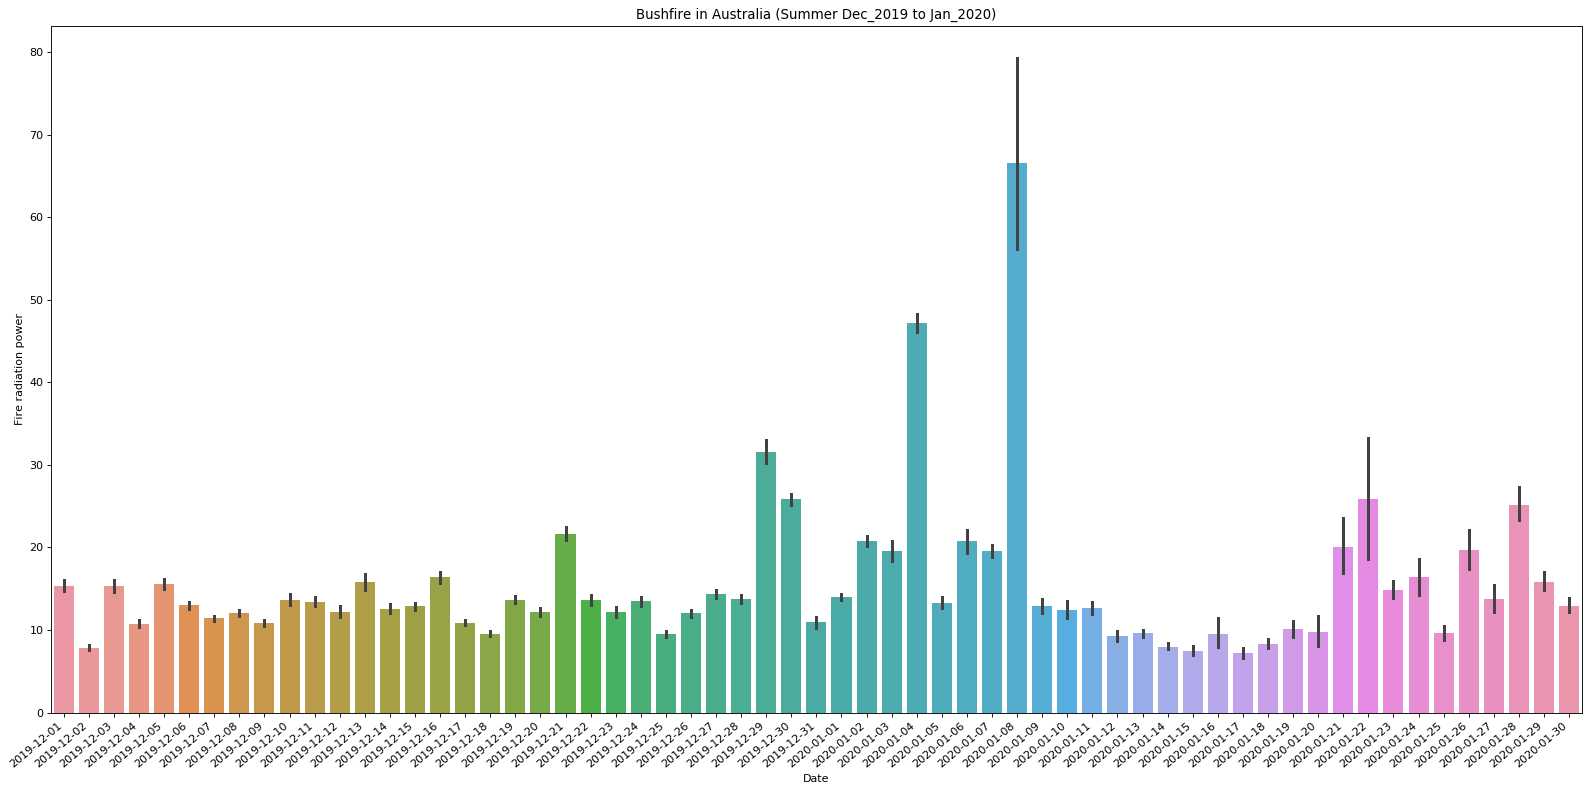

In [50]:
plt.figure(figsize=(20,10), dpi= 80)
ax = sns.barplot(x='acq_date',y='frp',data=Dec_Jan)



ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") # this rotates the labels at a 40degree

plt.xlabel("Date")
plt.ylabel('Fire radiation power')
plt.title("Bushfire in Australia (Summer Dec_2019 to Jan_2020)")
plt.tight_layout()


From the graph we can see that
+ The highest FRP recorded was on Jan 8th 2020, and 
+ the second being 4th of January

The graph shows how the fire intensity increased and decreased over the months of Dec and Jan 

### The two days with the highest fire readiation observed

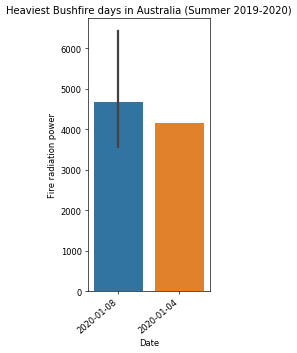

In [116]:
plt.figure(figsize=(4,6), dpi= 60)
ax = sns.barplot(x='acq_date',y='frp',data=fire_high_fire)

ax.set_xticklabels(ax.get_xticklabels(), 
                   rotation=40, 
                   ha="right") # this rotates the labels at a 40degree

plt.xlabel("Date")
plt.ylabel('Fire radiation power')
plt.title("Heaviest Bushfire days in Australia (Summer 2019-2020)")
plt.tight_layout()


## 2.Interactive maps

In [61]:
#!pip install git+https://github.com/python-visualization/branca
#!pip install git+https://github.com/sknzl/folium@update-css-url-to-https

In [60]:
# before importing packages install letest version of folium above
import os
import numpy as np
import folium
from folium import plugins
print(folium.__version__)

0.10.1+8.g4ea1307


### Map of Australia

In [92]:
m = folium.Map(location=[-35.0,144], control_scale=True,
               width=750, height=500,
               zoom_start=3,attr = "text some",
               tiles='Stamen Terrain')

plugins.ScrollZoomToggler().add_to(m)
m

### Highest fire recorded in a day

In [93]:
#Create a map
m = folium.Map(location=[-35.0,144], 
               control_scale=True,
               height=500,
               zoom_start=4,
               attr = "text some",
               tiles='Stamen Terrain')
df_copy = fire_high_fire.copy()


# loop through data to create Marker for each fire region
for i in range(0,len(df_copy)):
    
    folium.Marker(
    location=[df_copy.iloc[i]['latitude'], df_copy.iloc[i]['longitude']],
    #popup=popup,
    tooltip="FRP: " + str(df_copy.iloc[i]['frp'])+
        " on " + str(df_copy.iloc[i]['acq_date']),
    icon=folium.Icon(color='red',icon='fire',prefix="fa"),
    ).add_to(m)
        
m

In [122]:
from folium.plugins import HeatMapWithTime
# A small function to get heat map with time given the data

def getmap(ip_data,location,zoom,radius):
    
    #get day list
    dfmap = ip_data[['acq_date','latitude','longitude','frp']]
    df_day_list = []
    for day in dfmap.acq_date.sort_values().unique():
        df_day_list.append(dfmap.loc[dfmap.acq_date == day, 
                                     ['acq_date','latitude',
                                      'longitude', 'frp']].groupby
                           (['latitude','longitude']).
                           sum().reset_index().values.tolist())
    
    # Create a map using folium
    m = folium.Map(location, 
                   zoom_start=4,
                   width=750,
                   tiles='Stamen Terrain')
    #creating heatmap with time
    HeatMapWithTime(df_day_list,index =list(dfmap.acq_date.sort_values().unique()), 
                    auto_play=False,radius=radius, gradient={0.2: 'purple', 0.4: 'yellow', 0.6: 'orange', 1: 'red'}, 
                    min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(m)

    return m
getmap(df,[-27,132],3.5,3)